# Objetivos con el Dataset de sentimientos obtenido de la aplicación Daylio

Con la información de las actividades, estas se pueden dividir por grupos, entre las cuales se podrían encontrar el sueño, condiciones cognitivas, ejercicio o actividad física, alimentación, educación, ocio, objetivos personales, tareas en casa, cuidado personal, entre otras.

El objetivo principal del proyecto es conocer **cómo influyen las actividades diarias en los estados emocionales** y viceversa. Además de **cómo afectan otros factores externos a una persona en sí, como la escuela, alimentación, sueño, entre otros, especificamente en las emociones de un adolescente**.

Algunas cuestiones que se pueden responder a lo largo del proyecto son:

- Análisis visual con graficas de tiempo (días de la semana, mes, año), así como en la contabilización de actividades y emociones.
- Relación de actividades con emociones positivas y negativas.
- Referente a la agrupación:
    - Actividades en función del impacto emocional (positivo, negativo o neutral) y ver qué tan influyentes son ciertas actividades en el estado emocional diario.
    - Influencia de actividades con emociones en patrones temporales.
    - Encontrar rutinas positivas y/o negativas analizando combinaciones frecuentes de actividades y emociones.
- Relación entre la sencación de descanso con la emoción.
- Relación entre productividad con las emociones.

Una vez observado cada comportamiento y detalle sobre cómo influyen las actividades y otras características en las emociones diarias, se tendrá el objetivo de crear modelos de Machine Learning a partir de lo siguiente: 

- Predicción de emoción.
- Predicción de cantidad de actividades.
- Recomendación de actividades ante situaciones adversas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('../data/raw/1ene2024_25jun2024.csv')
df2 = pd.read_csv('../data/raw/10ago2024_23jun2025.csv')

In [3]:
df1.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2024-06-25,June 25,Tuesday,10:18 AM,Bien,Feliz | Relajado | Contento | Cansado | Ocupad...,NaN,NaN
1,2024-06-24,June 24,Monday,8:00 PM,Bien,Contento | Ocupado | Confundido | Buen sueño |...,NaN,NaN
2,2024-06-23,June 23,Sunday,8:00 PM,Bien,Feliz | Relajado | Contento | Motivado | Produ...,NaN,NaN
3,2024-06-22,June 22,Saturday,8:00 PM,Bien,Feliz | Relajado | Contento | Cansado | Motiva...,NaN,NaN
4,2024-06-21,June 21,Friday,8:00 PM,Bien,Relajado | Contento | Ansioso | Decepcionado |...,NaN,NaN


In [4]:
df2.head()

,full_date,date,weekday,time,mood,activities,note_title,note
0,2025-06-23,23 Jun,Monday,10:45 p.m.,Bien,Buen sueño | Relajado | Contento | Productivo ...,NaN,NaN
1,2025-06-20,20 Jun,Friday,1:32 p.m.,Mal,Buen sueño | Cansado | Aburrido | Enfermo,NaN,NaN
2,2025-06-19,19 Jun,Thursday,10:45 p.m.,Increíble,Buen sueño | Feliz | Enamorado | Contento | Ca...,NaN,NaN
3,2025-06-16,16 Jun,Monday,10:45 p.m.,Bien,Buen sueño | Relajado | Contento | Ejercicio |...,NaN,NaN
4,2025-06-15,15 Jun,Sunday,10:45 p.m.,Meh,Sueño malo | Feliz | Relajado | Contento | Pro...,NaN,NaN


# Data cleaning

Antes de comenzar el análisis exploratorio, vamos a arreglar los DataFrames, ya que vienen en formatos diferentes, específicamente para el caso de `time` y `date`, además de que no se necesita de las columnas `note_title` ni `note`.
También eliminar temporalmente los datos del 2025, ya que podrían darse errores de desproporcionalidad.

In [5]:
df1 = df1.drop(columns=['date', 'note_title', 'note'])
df2 = df2.drop(columns=['date', 'note_title', 'note'])

In [6]:
# Convertir el formato de 'time' en df2 al formato AM - PM
df2['time'] = df2['time'].str.replace(r'\.m\.', 'M', regex=True).str.replace(r'a', 'A', regex=True).str.replace(r'p', 'P', regex=True)

In [7]:
df2_filtered = df2[df2['full_date'] <= '2024-12-31']

In [8]:
# Por defecto axis=0
df = pd.concat([df2, df1])

In [9]:
df.head()

,full_date,weekday,time,mood,activities
0,2025-06-23,Monday,10:45 PM,Bien,Buen sueño | Relajado | Contento | Productivo ...
1,2025-06-20,Friday,1:32 PM,Mal,Buen sueño | Cansado | Aburrido | Enfermo
2,2025-06-19,Thursday,10:45 PM,Increíble,Buen sueño | Feliz | Enamorado | Contento | Ca...
3,2025-06-16,Monday,10:45 PM,Bien,Buen sueño | Relajado | Contento | Ejercicio |...
4,2025-06-15,Sunday,10:45 PM,Meh,Sueño malo | Feliz | Relajado | Contento | Pro...


In [10]:
df.tail()

,full_date,weekday,time,mood,activities
172,2024-01-05,Friday,7:14 PM,Bien,Cansado | Aburrido | Ansioso | Sueño medio | E...
173,2024-01-04,Thursday,9:36 PM,Bien,Feliz | Relajado | Buen sueño | Ejercicio | Co...
174,2024-01-03,Wednesday,7:26 PM,Bien,Feliz | Contento | Buen sueño | Ejercicio | Ag...
175,2024-01-02,Tuesday,8:17 PM,Bien,Feliz | Relajado | Contento | Sueño medio | Ej...
176,2024-01-01,Monday,1:56 PM,Meh,Relajado | Aburrido | Sueño medio


# Exploratory Data Analysis & Preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 176
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   457 non-null    object
 1   weekday     457 non-null    object
 2   time        457 non-null    object
 3   mood        457 non-null    object
 4   activities  457 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [12]:
df.describe(include=['O'])

,full_date,weekday,time,mood,activities
count,457,457,457,457,457
unique,457,7,230,5,454
top,2025-06-23,Monday,10:45 PM,Bien,Buen sueño | Relajado | Contento
freq,1,67,101,340,2


## Visualizaciones y Estadísticas

In [13]:
import calendar
import locale

In [14]:
locale.setlocale(locale.LC_TIME, 'es_MX.UTF-8')

# Asignar un color a cada tipo de emoción
mood_data = {
    'Horrible': 'crimson',
    'Mal': 'orange',
    'Meh': 'skyblue',
    'Bien': 'limegreen',
    'Increíble': 'turquoise'
}

# Convertir full_date a tipo datetime para extraer fácilmente el mes
df['full_date'] = pd.to_datetime(df['full_date'], errors='coerce')

# Extraer el mes con tipo numérico
df['month'] = df['full_date'].dt.month

moods_sorted = list(mood_data.keys())

# Columna para convertir moods a números ordenados (0: Terrible a 4: Increíble)
mapped_order = {mood: i for i, mood in enumerate(moods_sorted, start=0)}
df['mood_numeric'] = df['mood'].map(mapped_order)

# Columna para asignar colores en base al mood
df['colors'] = df['mood'].map(mood_data)

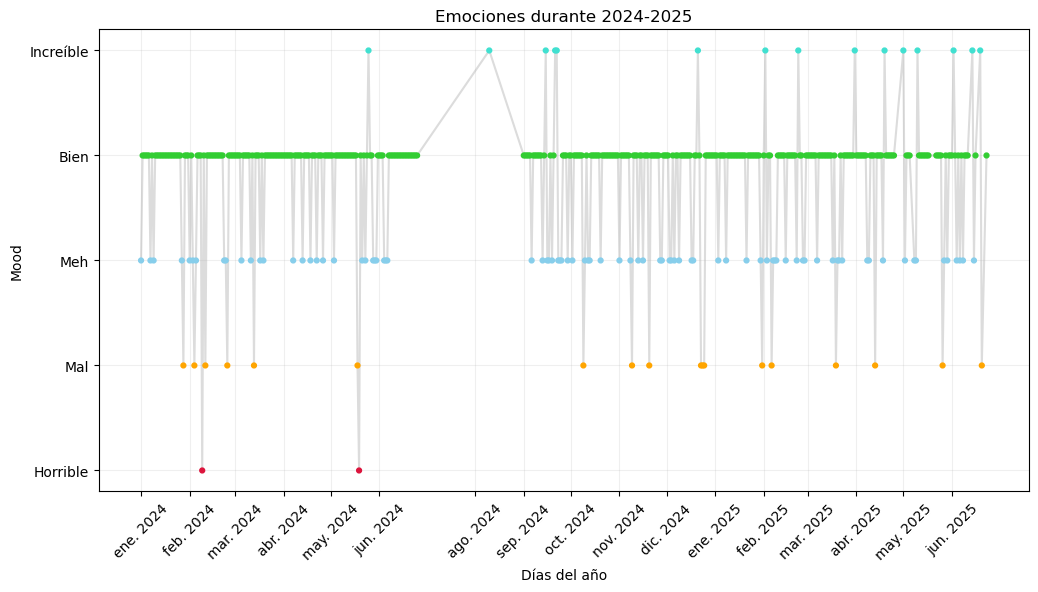

In [15]:
import matplotlib.dates as mdates

x = df['full_date']
y = df['mood_numeric']

plt.figure(figsize=(12, 6))

plt.plot(x, y, c='gainsboro', zorder=1)
plt.scatter(x, y, c=df['colors'], s=12, zorder=2)
plt.grid(True, alpha=0.2)

plt.xlabel("Días del año")
plt.ylabel("Mood")

# Reemplazar números por categorías originales
plt.yticks(ticks=range(0, len(mood_data)), labels=moods_sorted) 

# Etiquetas con mes y año
unique_months = df['full_date'].dt.to_period('M').unique()
xticks = [month.to_timestamp() for month in unique_months]
xlabels = [month.to_timestamp().strftime('%b %Y') for month in unique_months]
plt.xticks(ticks=xticks, labels=xlabels, rotation=45)

plt.title("Emociones durante 2024-2025")

plt.show()

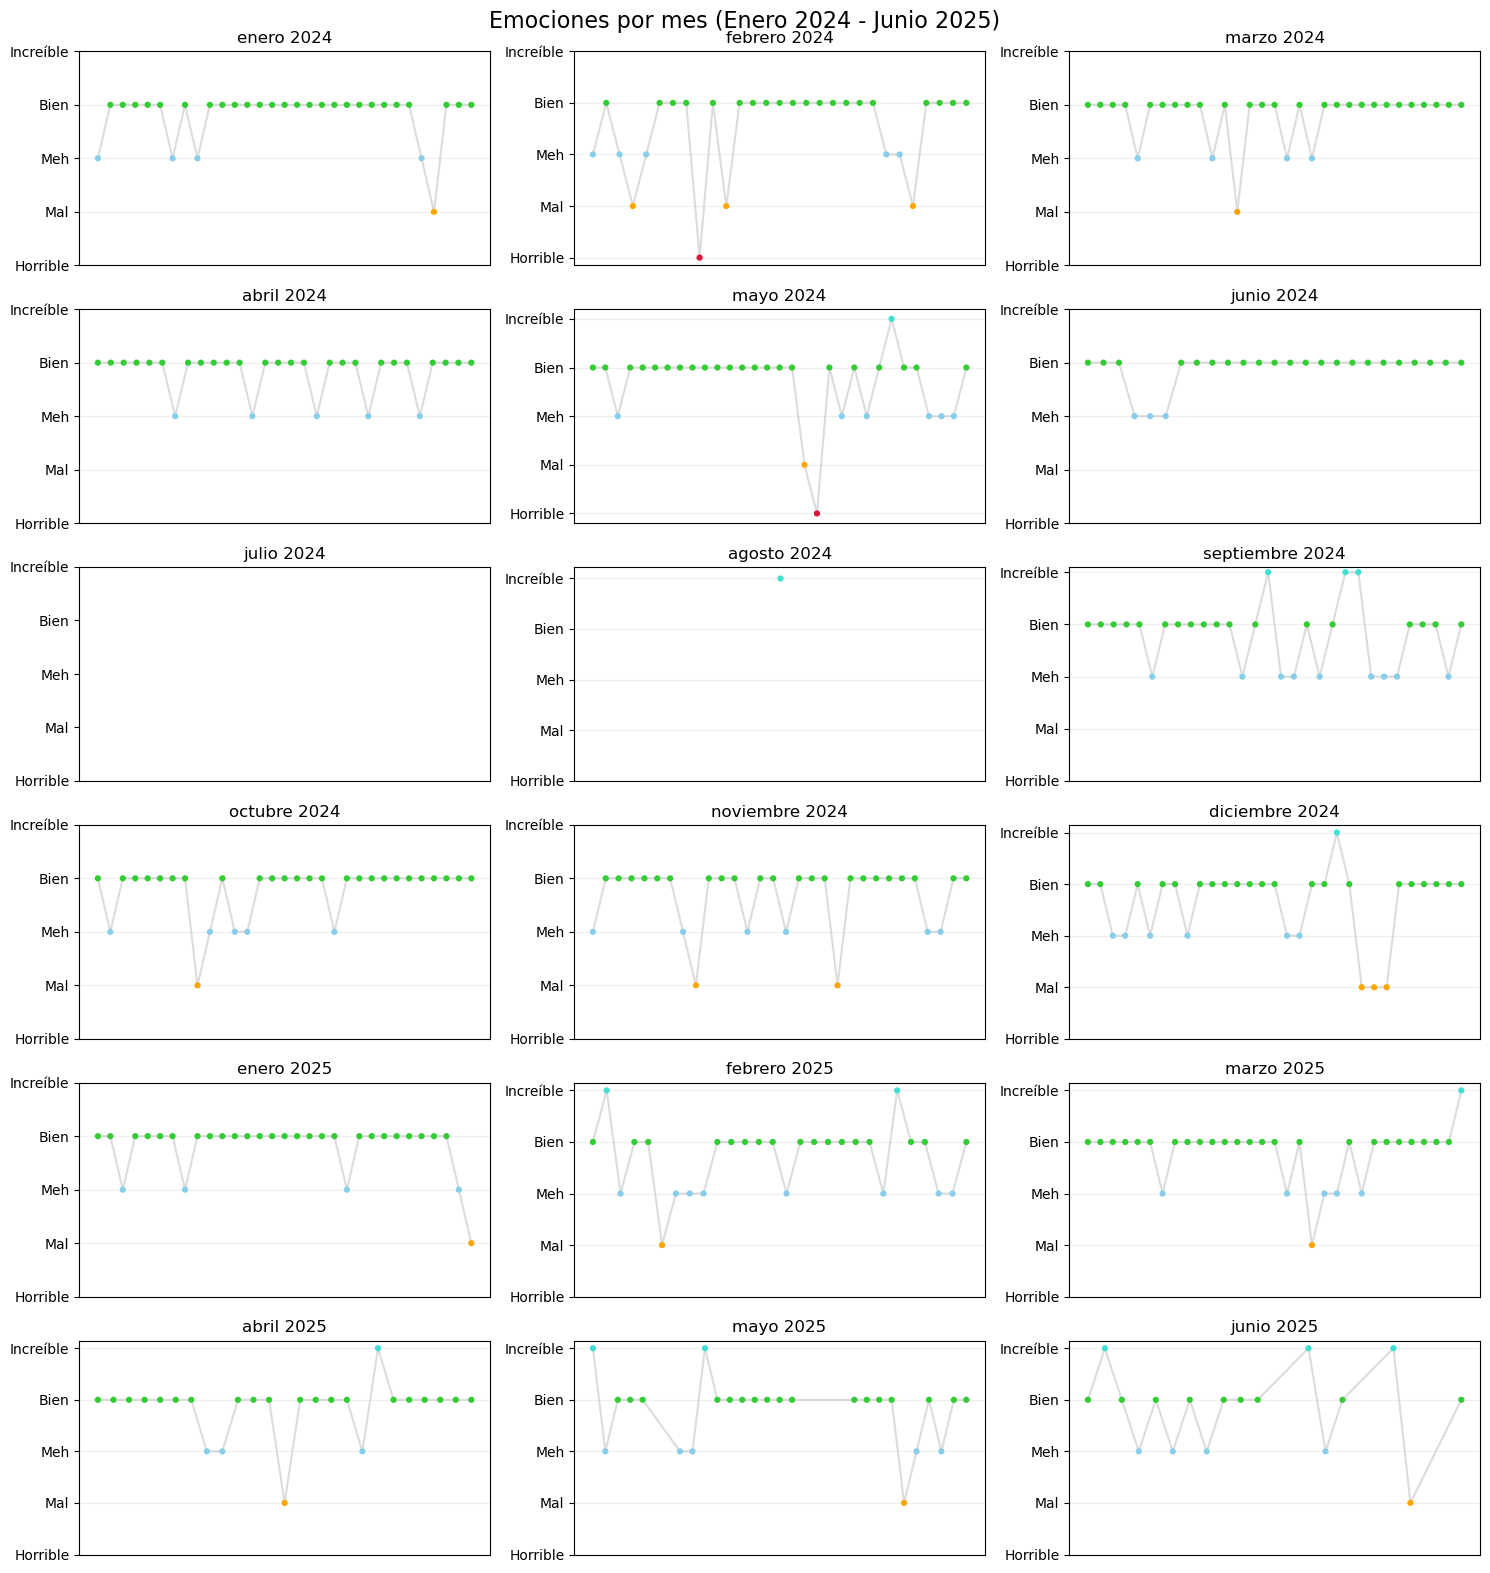

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(15, 16))
axes = axes.flatten()

# Lista de meses con sus años correspondientes
months_years = []
for year in [2024, 2025]:
    end_month = 12 if year == 2024 else 6  # 2024: enero-diciembre, 2025: enero-junio
    for month in range(1, end_month + 1):
        months_years.append((year, month))

for i, (year, month) in enumerate(months_years):
    ax = axes[i]
    
    # Filtrar los datos por año y mes
    df_month = df[(df['full_date'].dt.year == year) & (df['full_date'].dt.month == month)]
    
    # Solo graficar si hay datos para ese mes
    if not df_month.empty:
        ax.scatter(df_month['full_date'], df_month['mood_numeric'], 
                  c=df_month['colors'], s=12, zorder=2)
        ax.plot(df_month['full_date'], df_month['mood_numeric'], 
               c='gainsboro', zorder=1)
        ax.grid(True, alpha=0.2)

    ax.set_title(f'{calendar.month_name[month]} {year}')
    ax.set_yticks(range(0, len(mood_data)))
    ax.set_yticklabels(moods_sorted)
    ax.set_xticks([])

fig.suptitle("Emociones por mes (Enero 2024 - Junio 2025)", fontsize=16)
plt.tight_layout()

plt.show()

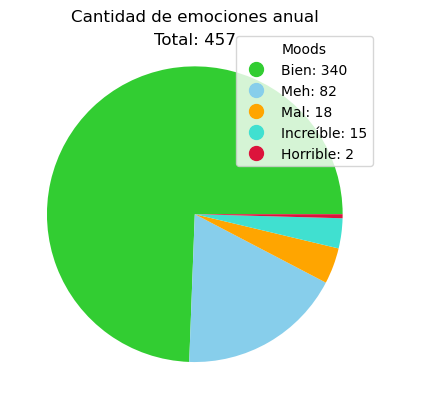

In [17]:
sum_moods = df['mood'].value_counts()
moods = sum_moods.index

colors = [mood_data[mood] for mood in moods]

plt.pie(
    sum_moods, 
    labels=moods,
    colors=colors,
    textprops=dict(color="w")
)

handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='') 
           for color in colors]
labels = [f"{mood}: {sum_moods[mood]}" for mood in moods]
plt.legend(handles, labels, title="Moods", loc='upper right')

plt.title("Cantidad de emociones anual")
plt.text(0, 1.15, f'Total: {df.shape[0]}', ha='center', fontsize=12)

plt.show()

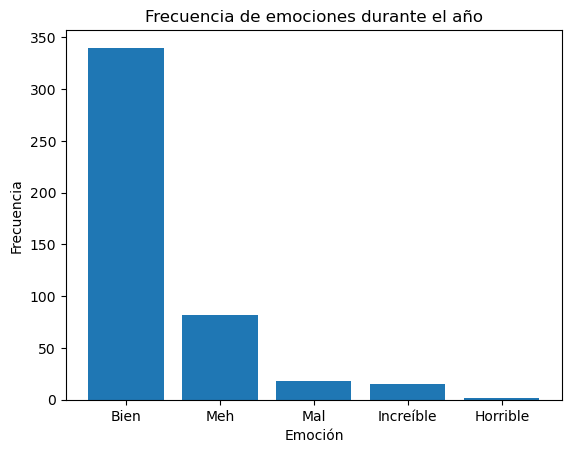

In [18]:
plt.bar(sum_moods.index, sum_moods.values)  
plt.xlabel('Emoción')
plt.ylabel('Frecuencia') 
plt.title('Frecuencia de emociones durante el año')

plt.show() 

In [19]:
df['year'] = df['full_date'].dt.year

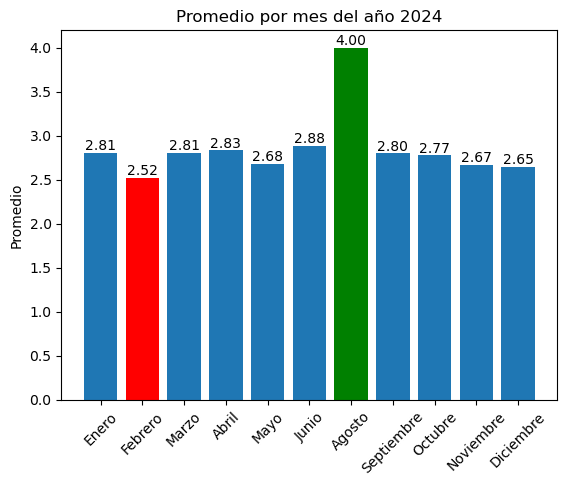

In [20]:
mean_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].mean()

max_value = mean_month.max()
min_value = mean_month.min()

max_index = mean_month.idxmax()
min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Promedio')
plt.title('Promedio por mes del año 2024')
plt.xticks(rotation=45)

plt.show()

Para las estadísticas mensuales, y en general, se tiene que considerar que __no hay datos del mes de julio__ y __sólo uno en el mes de agosto__. Por lo cual para el siguiente gráfico se considera el promedio a partir de la cantidad total de días 
por mes.

Esto ya que en la anterior al haber sólo un registro hecho en agosto (Increíble) hace parecer que es el mes con el promedio más alto.

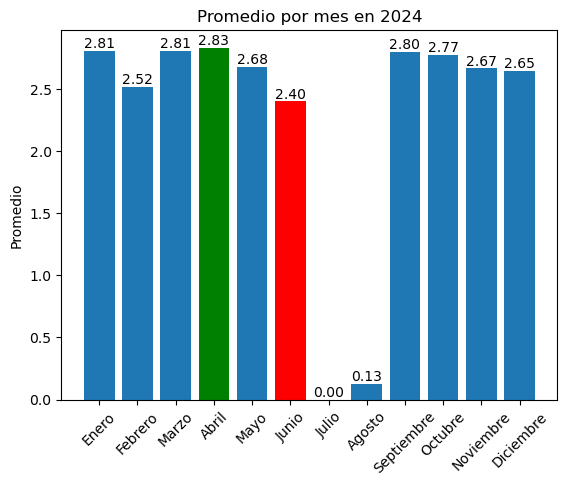

In [21]:
# Cantidad de registros por mes
size_month = pd.Series({1: 31, 2: 29, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31})

# Suma de valores de mood por mes
sum_month = df[df['year'] == 2024].groupby('month')['mood_numeric'].sum()
    
mean_month = sum_month / size_month
mean_month = mean_month.fillna(0)

max_value = mean_month.max()
# min_value = mean_month.min()

max_index = mean_month.idxmax()
# min_index = mean_month.idxmin()

colors = ['green' if i == max_index else 'red' if i == 6 else 'C0' for i in mean_month.index]

bars = plt.bar([calendar.month_name[i].capitalize() for i in mean_month.index], mean_month.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_month.values])

plt.ylabel('Promedio')
plt.title('Promedio por mes en 2024')
plt.xticks(rotation=45)
plt.show()

Con la gráfica anterior se puede concluir que el mes con **mejor mood** fue en **abril**, mientras que el que tiene el **peor mood** (sin tomar en cuenta a julio y agosto por la cantidad de registros) fue **junio**.
<br>
E incluso a pesar de lo anterior, se debe tomar en cuenta que en el mes de **septiembre** fue el mes con más moods de **Increíble**, mientras que **febrero** y **mayo** fueron los únicos meses con el mood de **Horrible** como se muestra en la siguiente tabla.

In [22]:
print("Cantidad de moods por mes en 2024")
df[df['year'] == 2024].groupby(['month', 'mood']).size().unstack(fill_value=0)  

Cantidad de moods por mes en 2024


mood,Bien,Horrible,Increíble,Mal,Meh
month,,,,,
1,26,0,0,1,4
2,20,1,0,3,5
3,26,0,0,1,4
4,25,0,0,0,5
5,22,1,1,1,6
6,22,0,0,0,3
8,0,0,1,0,0
9,18,0,3,0,9
10,25,0,0,1,5


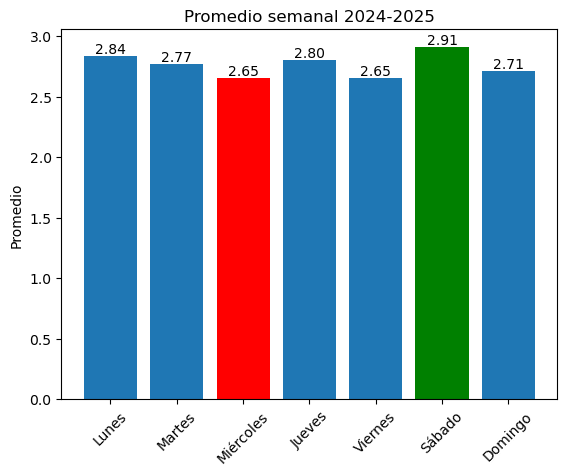

In [23]:
mean_weekday = df.groupby('weekday')['mood_numeric'].mean()

days_translation = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

mean_weekday.index = mean_weekday.index.map(days_translation)

days_order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

mean_weekday = mean_weekday.reindex(days_order)  # Reordenar días

max_value = mean_weekday.max()
min_value = mean_weekday.min()

max_index = mean_weekday.idxmax()
min_index = mean_weekday.idxmin()

colors = ['green' if i == max_index else 'red' if i == min_index else 'C0' for i in mean_weekday.index]

bars = plt.bar(mean_weekday.index, mean_weekday.values, color=colors)

plt.bar_label(bars, labels=[f'{val:.2f}' for val in mean_weekday.values])

plt.ylabel('Promedio')
plt.title('Promedio semanal 2024-2025')
plt.xticks(rotation=45)
plt.show()

Esta anterior gráfica representa igualmente el promedio del mood por día de la semana a lo largo de ambos años, donde se muestra que el día con **mejor** mood ha sido el **sábado**, mientras que el que ha tenido **peor** fue el *miércoles**, aunque a 2 cifras el **viernes** tiene el mismo valor.

In [24]:
df['activities_count'] = df['activities'].apply(lambda x: len(x.split(' | ')))

In [25]:
df['activities_count'].describe()

count    457.000000
mean       8.916849
std        3.011979
min        2.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       21.000000
Name: activities_count, dtype: float64

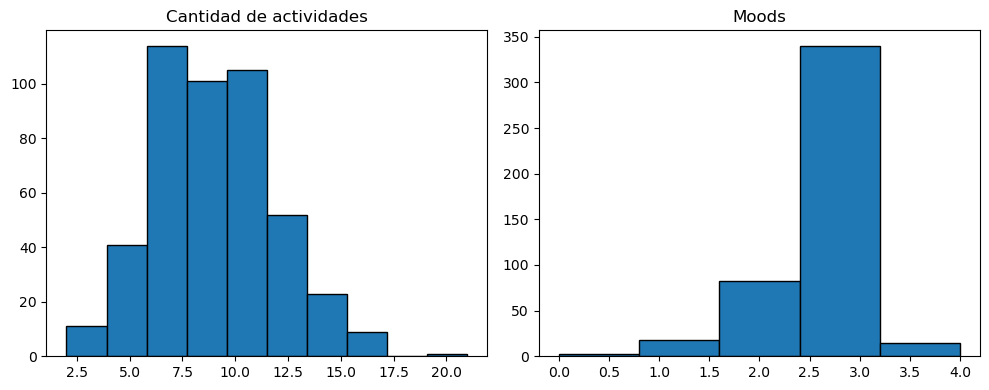

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].hist(df['activities_count'], edgecolor='black')
axes[0].set_title("Cantidad de actividades")

axes[1].hist(df['mood_numeric'], edgecolor='black', bins=5)
axes[1].set_title("Moods")

plt.tight_layout()
plt.show()

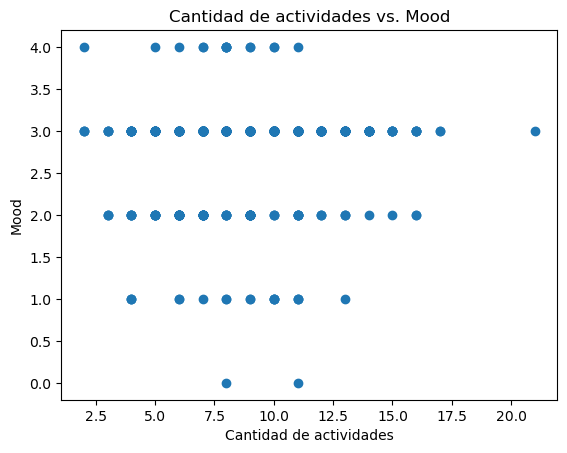

In [27]:
plt.scatter(df['activities_count'], df['mood_numeric'])
plt.title('Cantidad de actividades vs. Mood')
plt.xlabel('Cantidad de actividades')
plt.ylabel('Mood')

plt.show()

In [28]:
df = df.drop('colors', axis=1)
print(df.columns, df.shape)

Index(['full_date', 'weekday', 'time', 'mood', 'activities', 'month',
       'mood_numeric', 'year', 'activities_count'],
      dtype='object') (457, 9)


In [29]:
# Todas las actividades en el dataset

# Set para evitar duplicados
unique_activities = set()
df['activities'].str.split('|').apply(lambda x: unique_activities.update([activity.strip() for activity in x]))
unique_activities = list(unique_activities)
unique_activities

['IA & Data',
 'Buen sueño',
 'Examen',
 'Emocionado',
 'Visita',
 'Bicicleta',
 'Limpiar',
 'Correr / Cardio',
 'Contento',
 'Reunión',
 'Productivo',
 'Viaje',
 'Pensativo',
 'Enfocado',
 'Lectura',
 'Sin dormir',
 'Clases completas',
 'Decepcionado',
 'Ocupado',
 'Protector solar',
 'Haircut',
 'Doctor',
 'Sueño temprano',
 'Cocinar',
 'Miedo',
 'Estresado',
 'Tarea',
 'Proyecto grupal',
 'Entretenimiento',
 'Feliz',
 'Evento',
 'Sueño medio',
 'Ansioso',
 'Enamorado',
 'Algoritmos',
 'Inglés',
 'Preocupado',
 'Competencia',
 'Compras',
 'Sueño malo',
 'Desmotivado',
 'Iniciar temprano',
 'Inseguro',
 'Salida',
 'Comer sano',
 'Triste',
 'Confundido',
 'Nostálgico',
 'Vacaciones',
 'Estudio',
 'Cansado',
 'Aburrido',
 'Agua',
 'Procrastinar',
 'Desesperado',
 'Enojado',
 'Hacer deberes',
 'Enfermo',
 'Proyecto',
 'Ejercicio',
 'Skin care',
 'Relajado',
 'Clase',
 'Motivado']

In [31]:
len(unique_activities)

64

Asignar una categoría ordinal para el sleep_level donde:
- Sin dormir: 0
- Sueño malo: 1
- Sueño medio: 2
- Sueño bueno: 3
- Sueño temprano: 4

Target Encoding para emotions. Luego, para positive, neutral y negative emotions, asignar la cantidad de emociones que se encuentren en un registro de ese tipo.
Para el resto de registros, igualmente asignar valores a partir de Target Encoding.

In [32]:
sleep_level = {
    'Sin dormir': 0,
    'Sueño malo': 1,
    'Sueño medio': 2,
    'Buen sueño': 3,
    'Sueño temprano': 4
}

def get_sleep_level(activity):
    for key, value in sleep_level.items():
        if key in activity:
            return value
    return np.nan

df['sleep_level'] = df['activities'].apply(get_sleep_level)

# En caso de no haber registros de sueño
df['sleep_level'].fillna(df['sleep_level'].mode().iloc[0], inplace=True)

Después de haber hecho un análisis sobre qué tipo de conversión era el más conveniente para cada una de las actividades, se determinó que las mejores opciones es hacer un Multi-Hot Encoding para cada una de las actividades, ya que este permite no tener perdida de información; así como un conteo por categoría tal como se muestra en las siguientes celdas de código.
Así como también la consideración de más adelante crear Embeddings sencillos para las emociones.

In [33]:
# Lista de actividades para encoding
emotions = [
    "Feliz", "Emocionado", "Enamorado", "Relajado", "Contento", "Cansado", "Inseguro", "Aburrido", "Ansioso",
    "Procrastinar", "Enojado", "Estresado", "Triste", "Desesperado", "Productivo", "Ocupado", "Confundido", 
    "Motivado", "Decepcionado" ,"Enfermo", "Desmotivado", "Miedo", "Pensativo", "Preocupado", "Nostálgico"
]

health = [
    "Ejercicio", "Comer sano", "Agua", "Correr / Cardio", "Doctor", "Haircut", "Skin care", "Protector solar", "Bicicleta"
]

productivity = [
    "Lectura", "Entretenimiento", "Iniciar temprano", "Enfocado", "Inglés", "IA & Data", "Algoritmos", 
    "Reunión", "Proyecto"
]

places = ["Visita", "Salida", "Viaje", "Vacaciones", "Competencia", "Evento"]

tasks = ["Compras", "Limpiar", "Cocinar", "Hacer deberes"]

school = ["Clase", "Estudio", "Tarea", "Examen", "Proyecto grupal", "Clases completas"]

In [34]:
# Separar en positive emotions, negative emotions y neutral_emotions
positive_emotions = [
    "Feliz", "Emocionado", "Enamorado", "Relajado", "Contento", "Productivo", "Motivado"
]

neutral_emotions = ["Ocupado", "Pensativo", "Cansado", "Nostálgico"]

negative_emotions = [
    "Confundido", "Inseguro", "Aburrido", "Ansioso", "Procrastinar", "Enojado", "Estresado", "Triste", 
    "Desesperado", "Decepcionado", "Enfermo", "Desmotivado", "Miedo",  "Preocupado"
]

In [35]:
df['activity_list'] = df['activities'].str.split(' \| ')

# Lista de nombres de las variables a contar
vars_to_count = [
    'emotions', 'health', 'productivity', 'places', 'tasks', 'school',
    'positive_emotions', 'neutral_emotions', 'negative_emotions'
]

# Función para contar actividades
def count_activities(df, target_activities, col_name):
    def count(row):
        return sum(1 for a in row['activity_list'] if a in target_activities)
    df[col_name] = df.apply(count, axis=1)
    return df

# Aplicar la función para cada variable
for var_name in vars_to_count:
    activities = globals()[var_name]
    df = count_activities(df, activities, var_name)
    
df.head(3)

,full_date,weekday,time,mood,activities,month,mood_numeric,year,activities_count,sleep_level,activity_list,emotions,health,productivity,places,tasks,school,positive_emotions,neutral_emotions,negative_emotions
0,2025-06-23,Monday,10:45 PM,Bien,Buen sueño | Relajado | Contento | Productivo ...,6,3,2025,10,3.0,"[Buen sueño, Relajado, Contento, Productivo, M...",4,4,1,0,0,0,4,0,0
1,2025-06-20,Friday,1:32 PM,Mal,Buen sueño | Cansado | Aburrido | Enfermo,6,1,2025,4,3.0,"[Buen sueño, Cansado, Aburrido, Enfermo]",3,0,0,0,0,0,0,1,2
2,2025-06-19,Thursday,10:45 PM,Increíble,Buen sueño | Feliz | Enamorado | Contento | Ca...,6,4,2025,8,3.0,"[Buen sueño, Feliz, Enamorado, Contento, Cansa...",5,1,0,1,0,0,3,1,1


In [36]:
# Debido a que algunos datos de "time", a pesar de estar visualmente correctos, tienen problemas al ser procesados
# Por lo que se hace el siguiente proceso
import re

def convert_float(hora_str):
    match = re.match(r'(\d{1,2}):(\d{2})\s*(AM|PM)', hora_str.strip(), re.IGNORECASE)
    if match:
        hour = int(match.group(1))
        minutes = int(match.group(2))
        meridian = match.group(3).upper()

        # Formato 24 horas
        if meridian == 'PM' and hour != 12:
            hour += 12
        elif meridian == 'AM' and hour == 12:
            hour = 0

        # Convertir minutos a decimal
        decimal_hour = hour + minutes / 60
        return round(decimal_hour, 2)
    else:
        return None

df['time'] = df['time'].apply(convert_float)

In [37]:
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['weekday'] = df['weekday'].map(weekday_map)

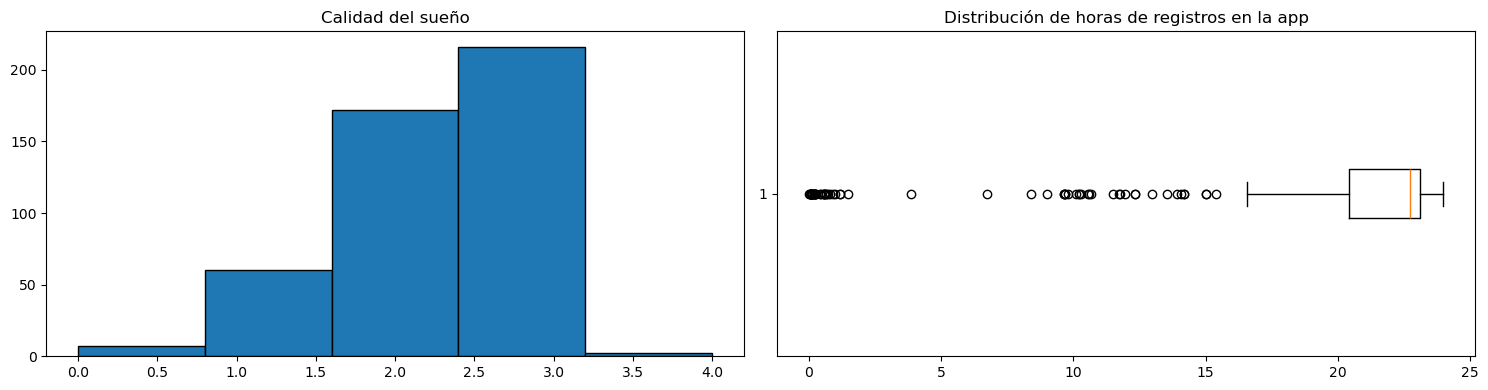

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

axes[0].hist(df['sleep_level'], edgecolor='black', bins=5)
axes[0].set_title("Calidad del sueño")

axes[1].boxplot(df['time'], vert=False)
axes[1].set_title("Distribución de horas de registros en la app")

plt.tight_layout()
plt.show()

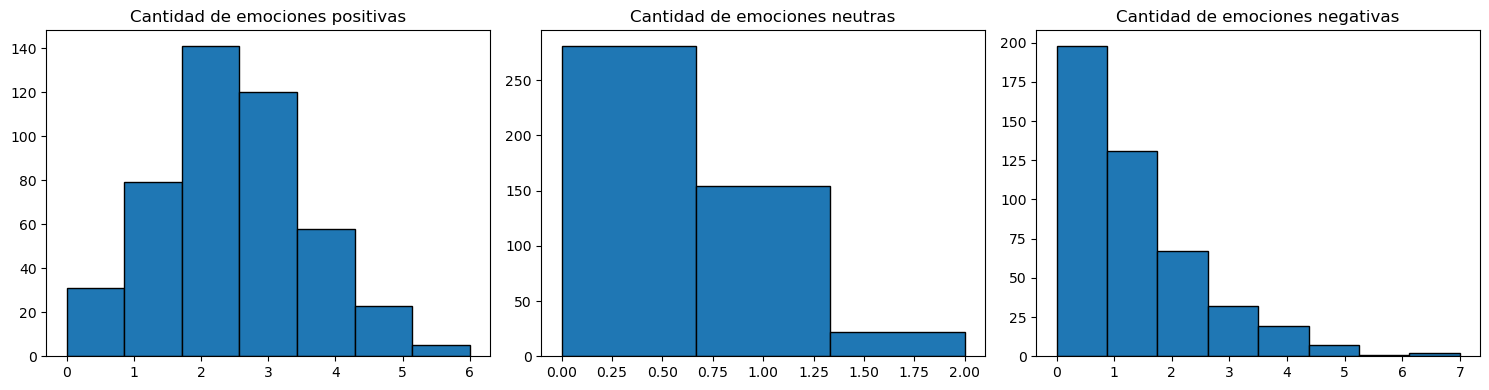

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df['positive_emotions'], edgecolor='black', bins=7)
axes[0].set_title("Cantidad de emociones positivas")

axes[1].hist(df['neutral_emotions'], edgecolor='black', bins=3)
axes[1].set_title("Cantidad de emociones neutras")

axes[2].hist(df['negative_emotions'], edgecolor='black', bins=8)
axes[2].set_title("Cantidad de emociones negativas")

plt.tight_layout()
plt.show()

In [40]:
# Aplicación del Multi-Hot Encoding para cada una de las actividades

# activities_list: lista con todas las actividades únicas del dataset
# activities_column: columna con actividades separadas por |
def create_multihot_encoding(df, activities_list, activities_column='activities'):
    
    # Crear mapeo de actividades a nombres de columnas
    activity_to_col = {}
    for activity in activities_list:
        col_name = activity.replace(' / ', '_').replace(' ', '_').lower()
        activity_to_col[activity] = col_name
    
    # Crear lista de nombres de columnas ordenadas
    column_names = list(activity_to_col.values())
    
    # Inicializar matriz con ceros
    # Se hace con numpy ya que modificar un dataframe directamente da warning de fragmentación
    data_matrix = np.zeros((len(df), len(column_names)), dtype=int)
    
    for row_idx, (idx, activities_str) in enumerate(df[activities_column].items()):
        if pd.isna(activities_str) or activities_str == "":
            continue  # Mantener todos los 0s para filas vacías
            
        # Separar actividades y limpiar espacios
        activities_list_current = [activity.strip() for activity in activities_str.split('|')]
        
        # Marcar como 1 las actividades presentes
        for activity in activities_list_current:
            if activity in activity_to_col:
                col_idx = column_names.index(activity_to_col[activity])
                data_matrix[row_idx, col_idx] = 1
            else:
                print(f"Actividad no reconocida en fila {idx}: '{activity}'")
    
    # Crear DataFrame de una vez con toda la data
    multihot_df = pd.DataFrame(data_matrix, 
                              columns=column_names, 
                              index=df.index)
    
    return multihot_df

In [41]:
# Aplicar el multi-hot encoding usando la lista de actividades
multihot_activities = create_multihot_encoding(df, unique_activities, 'activities')
df = pd.concat([df, multihot_activities], axis=1)

print(f"Se crearon {len(multihot_activities.columns)} columnas")
print(f"Basadas en {len(unique_activities)} actividades únicas")

Se crearon 64 columnas
Basadas en 64 actividades únicas


In [42]:
df.head(3)

,full_date,weekday,time,mood,activities,month,mood_numeric,year,activities_count,sleep_level,...,desesperado,enojado,hacer_deberes,enfermo,proyecto,ejercicio,skin_care,relajado,clase,motivado
0,2025-06-23,0,22.75,Bien,Buen sueño | Relajado | Contento | Productivo ...,6,3,2025,10,3.0,...,0,0,0,0,0,1,0,1,0,1
1,2025-06-20,4,13.53,Mal,Buen sueño | Cansado | Aburrido | Enfermo,6,1,2025,4,3.0,...,0,0,0,1,0,0,0,0,0,0
2,2025-06-19,3,22.75,Increíble,Buen sueño | Feliz | Enamorado | Contento | Ca...,6,4,2025,8,3.0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 0 to 176
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   full_date          457 non-null    datetime64[ns]
 1   weekday            457 non-null    int64         
 2   time               457 non-null    float64       
 3   mood               457 non-null    object        
 4   activities         457 non-null    object        
 5   month              457 non-null    int32         
 6   mood_numeric       457 non-null    int64         
 7   year               457 non-null    int32         
 8   activities_count   457 non-null    int64         
 9   sleep_level        457 non-null    float64       
 10  activity_list      457 non-null    object        
 11  emotions           457 non-null    int64         
 12  health             457 non-null    int64         
 13  productivity       457 non-null    int64         
 14  places         

In [44]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
full_date,457,2024-09-26 07:02:13.916848896,2024-01-01 00:00:00,2024-04-24 00:00:00,2024-10-21 00:00:00,2025-02-12 00:00:00,2025-06-23 00:00:00,NaN
weekday,457.0,3.002188,0.0,1.0,3.0,5.0,6.0,2.007113
time,457.0,19.973151,0.0,20.43,22.75,23.1,23.98,6.521932
month,457.0,5.260394,1.0,2.0,4.0,9.0,12.0,3.529951
mood_numeric,457.0,2.761488,0.0,3.0,3.0,3.0,4.0,0.594201
...,...,...,...,...,...,...,...,...
ejercicio,457.0,0.315098,0.0,0.0,0.0,1.0,1.0,0.465064
skin_care,457.0,0.455142,0.0,0.0,0.0,1.0,1.0,0.498529
relajado,457.0,0.702407,0.0,0.0,1.0,1.0,1.0,0.457701
clase,457.0,0.078775,0.0,0.0,0.0,0.0,1.0,0.269682


In [48]:
df.to_csv('../data/processed/moods_2024.csv', index=False)